Original Dataset:
   SepalLength  SepalWidth  PetalLength  PetalWidth      Species
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa 

Missing Values in Each Column:
SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64 

Number of duplicate rows before removal: 3
Number of duplicate rows after removal: 0

Discretized Sepal Length:
   SepalLength SepalLengthCategory
0          5.1               Short
1          4.9          Very Short
2          4.7          Very Short
3          4.6          Very Short
4          5.0          Very Short 

Dataset after outlier removal:
       SepalLength  SepalWidth  PetalLength  PetalWidth
count   143.000000  143.000000   143.000000  143

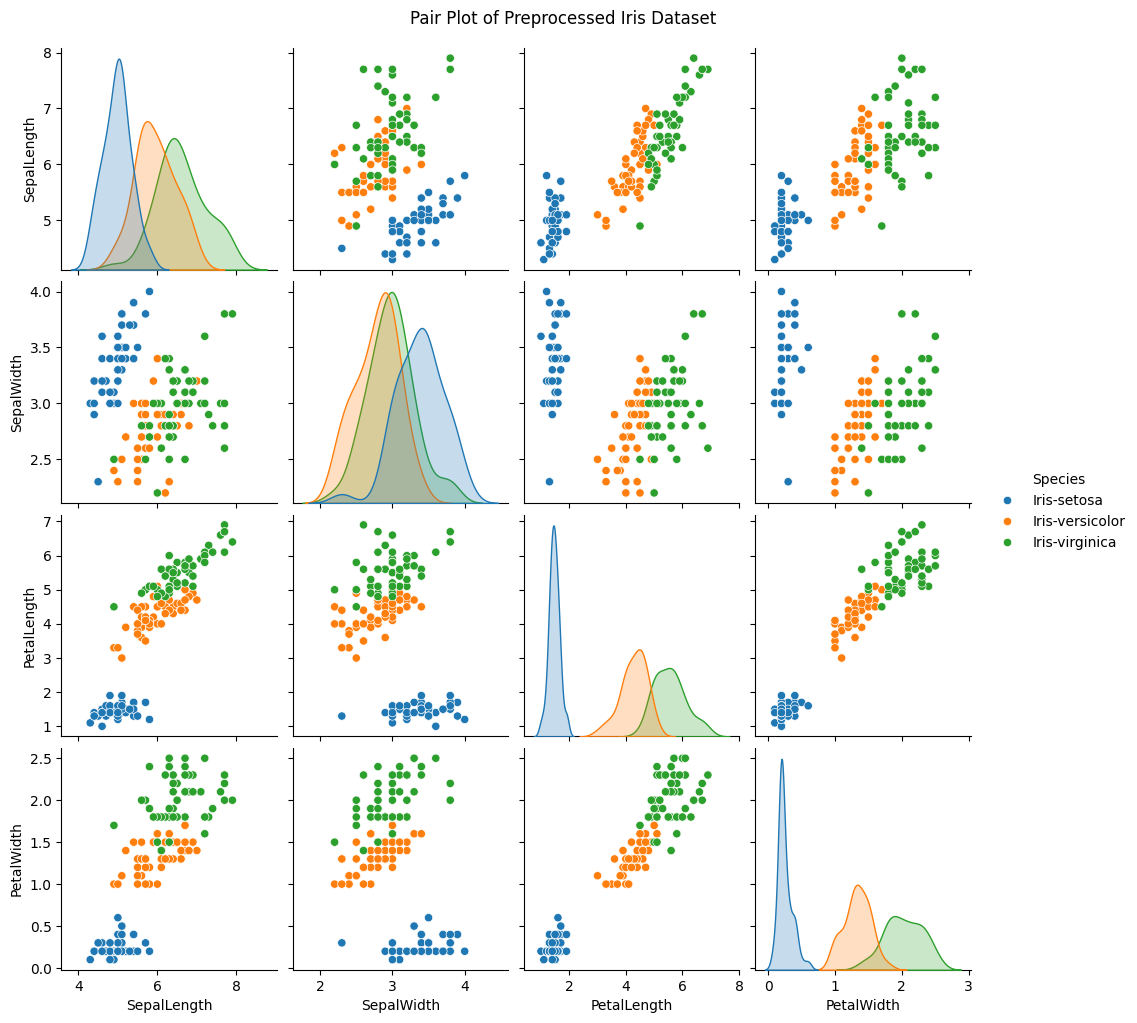

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset from a URL
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
iris = pd.read_csv(dataset_url, names=columns)

# Display the first few rows of the dataset
print("Original Dataset:")
print(iris.head(), "\n")

# 1. Handling Missing Values
# Check for missing values
print("Missing Values in Each Column:")
print(iris.isnull().sum(), "\n")

# For this example, we will assume there are no missing values.
# If there were, we could fill them with the mean or median:
# iris.fillna(iris.mean(), inplace=True)

# 2. Removing Duplicates
duplicates_before = iris.duplicated().sum()
print(f"Number of duplicate rows before removal: {duplicates_before}")
iris.drop_duplicates(inplace=True)
duplicates_after = iris.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicates_after}\n")

# 3. Discretization
# Discretizing SepalLength into categories
bins = [0, 5, 6, 7, 8]  # Define bins (4 intervals)
labels = ['Very Short', 'Short', 'Medium', 'Long']  # Only 4 labels
iris['SepalLengthCategory'] = pd.cut(iris['SepalLength'], bins=bins, labels=labels)
print("Discretized Sepal Length:")
print(iris[['SepalLength', 'SepalLengthCategory']].head(), "\n")

# 4. Outlier Detection and Removal using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']:
    iris = remove_outliers(iris, column)

print("Dataset after outlier removal:")
print(iris.describe(), "\n")

# 5. Sampling: Taking a random sample of 20% of the dataset
sampled_iris = iris.sample(frac=0.2, random_state=42)
print("Random Sample of the Dataset (20%):")
print(sampled_iris, "\n")

# Visualize the preprocessed data (optional)
sns.pairplot(iris, hue='Species')
plt.suptitle('Pair Plot of Preprocessed Iris Dataset', y=1.02)
plt.show()
